In [ ]:
#imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
import plotly.offline as pyo
import plotly.graph_objs as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 0. Загрузка дата сета

In [ ]:
#data-loading function
def load_data(path_to_data):
  df = pd.read_csv(path_to_data, delimiter = ',', names=['Фамилия', 'Имя', 'Отчество', 'Пол'])
  return df

path_to_data = "/content/drive/My Drive/data.csv"
dataset = load_data(path_to_data)
#test output
print(dataset.head())

    Фамилия       Имя      Отчество Пол
0    АБАБИЙ    АНДРЕЙ    ВАСИЛЬЕВИЧ   М
1  АБАБИЛОВ   ДМИТРИЙ    НИКОЛАЕВИЧ   М
2  АБАБИЛОВ  ВЛАДИМИР      ИВАНОВИЧ   М
3  АБАБИЛОВ    СЕРГЕЙ      ИВАНОВИЧ   М
4  АБАБИЛОВ      ЮРИЙ  ВЛАДИМИРОВИЧ   М


# 1. Разведочный аназил данных(EDA)

Ниже представлена диаграмма, на которой представленны данные о числе представителей различных полов

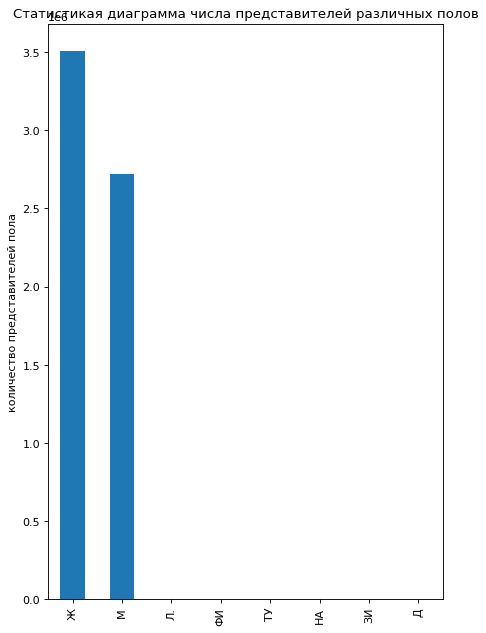

In [ ]:
# Statistic data of gender count
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('количество представителей пола')
        plt.xticks(rotation = 90)
        plt.title('Статистикая диаграмма числа представителей различных полов')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(dataset, dataset.shape[0], dataset.shape[1])    

Как можно заметить было выведено 8 полов...

In [ ]:
dataset = dataset[dataset['Пол'].isin(['М', 'Ж'])]#избавимся от лишних...
dataset.reset_index(drop=True)

,Фамилия,Имя,Отчество,Пол
0,АБАБИЙ,АНДРЕЙ,ВАСИЛЬЕВИЧ,М
1,АБАБИЛОВ,ДМИТРИЙ,НИКОЛАЕВИЧ,М
2,АБАБИЛОВ,ВЛАДИМИР,ИВАНОВИЧ,М
3,АБАБИЛОВ,СЕРГЕЙ,ИВАНОВИЧ,М
4,АБАБИЛОВ,ЮРИЙ,ВЛАДИМИРОВИЧ,М
...,...,...,...,...
6228595,ИЩЕНКО,МАЙЯ,АННАДУРДЫЕВНА,Ж
6228596,КОСТЮШИНА,НАТАЛИЯ,ВЯЧЕСЛАВОВНА,Ж
6228597,КАСАТКИНА,ТАТЬЯНА,ВЛАДИМИРОВНА,Ж
6228598,МАКСАКОВА,ГАЛИНА,ГЕОРГИЕВНА,Ж


Теперь еще раз вызовем функцию для построения диаграммы

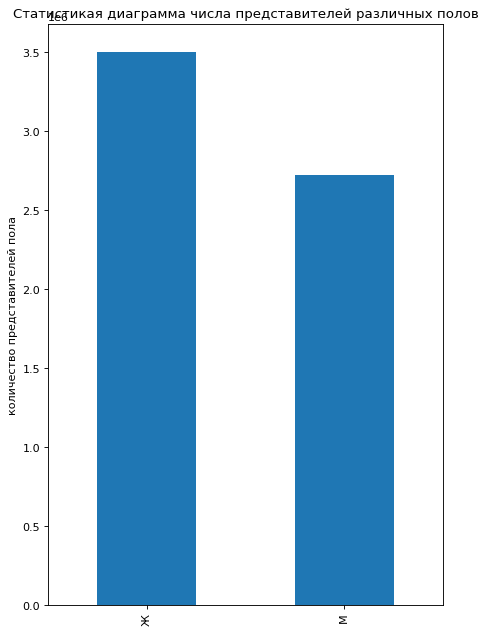

In [ ]:
plotPerColumnDistribution(dataset, dataset.shape[0],dataset.shape[1])    

 Выведем статистику по 30 самым частоповторяющимся фамилиям, именам и отчествам

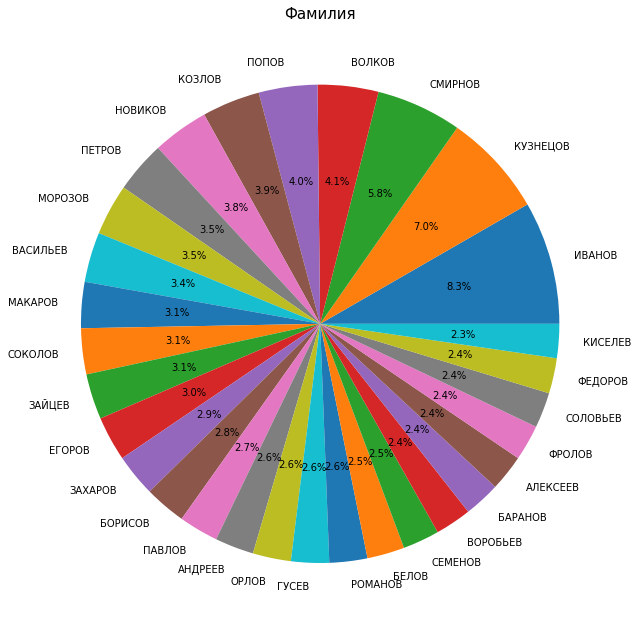

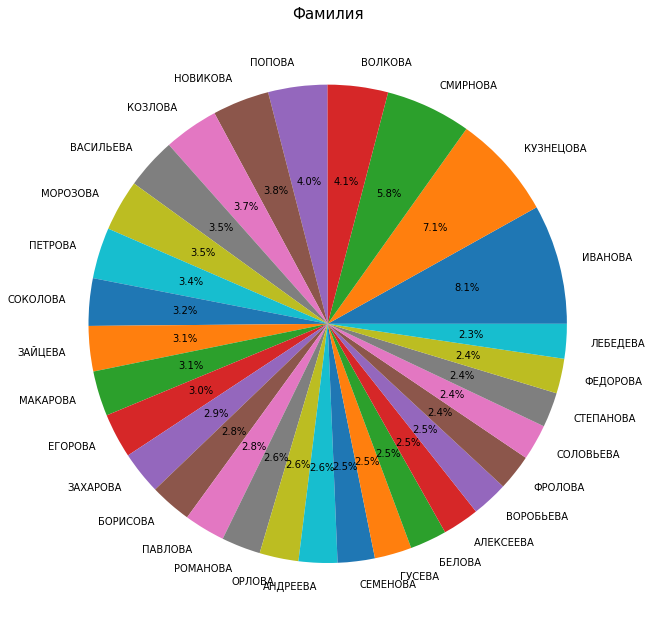

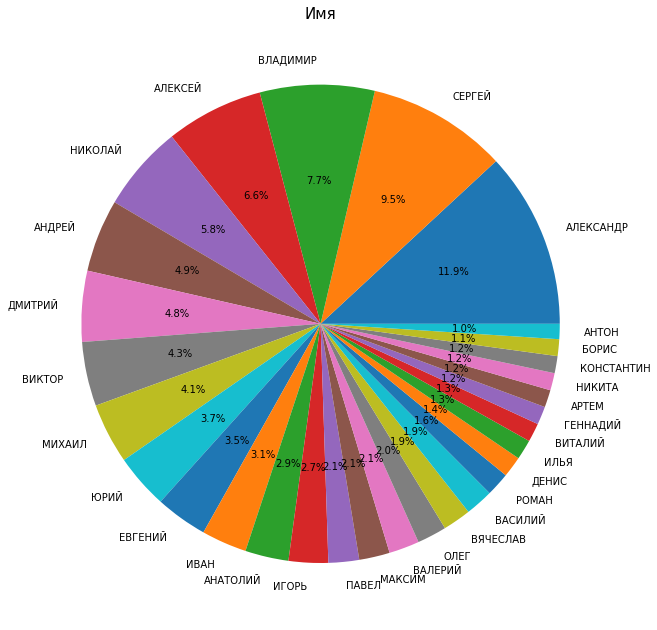

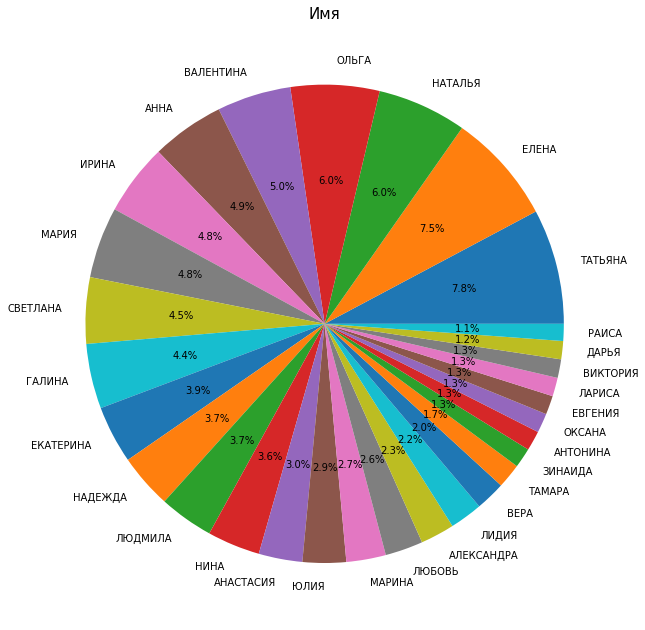

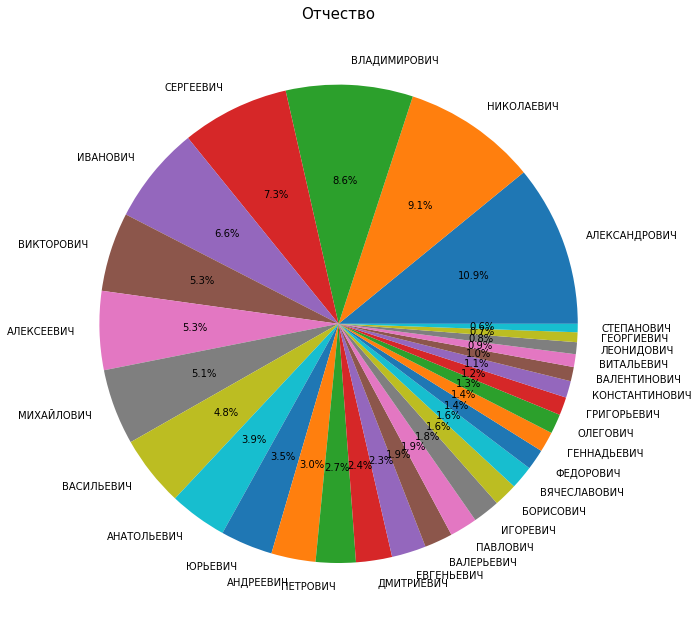

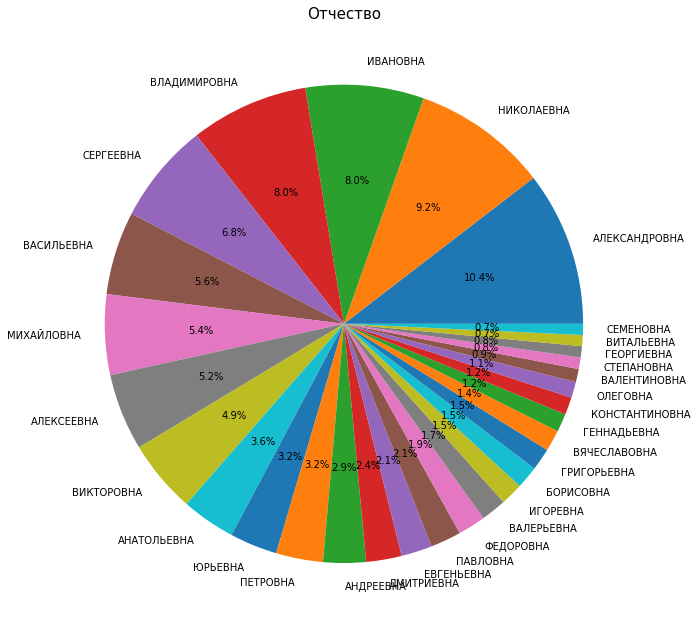

In [ ]:
def statFullName(dataset):
  men = dataset[dataset['Пол'].eq('М')]
  women = dataset[dataset['Пол'].eq('Ж')]
  surname_m = men.groupby('Фамилия').size()/men['Пол'].count()*30
  m = surname_m.sort_values(ascending=False)[:30]
  labels_m = m.index
  values_m = m.values

  surname_w = women.groupby('Фамилия').size()/women['Пол'].count()*30
  w = surname_w.sort_values(ascending=False)[:30]
  labels_w = w.index
  values_w = w.values

  plt.figure(figsize=(11,11))
  plt.pie(values_m,labels=labels_m,autopct="%1.1f%%")
  plt.title("Фамилия",size=15)
  plt.show()

  plt.figure(figsize=(11,11))
  plt.pie(values_w,labels=labels_w,autopct="%1.1f%%")
  plt.title("Фамилия",size=15)
  plt.show()

  name_m = men.groupby('Имя').size()/men['Пол'].count()*30
  m = name_m.sort_values(ascending=False)[:30]
  labels_m = m.index
  values_m = m.values

  name_w = women.groupby('Имя').size()/women['Пол'].count()*30
  w = name_w.sort_values(ascending=False)[:30]
  labels_w = w.index
  values_w = w.values

  plt.figure(figsize=(11,11))
  plt.pie(values_m,labels=labels_m,autopct="%1.1f%%")
  plt.title("Имя",size=15)
  plt.show()

  plt.figure(figsize=(11,11))
  plt.pie(values_w,labels=labels_w,autopct="%1.1f%%")
  plt.title("Имя",size=15)
  plt.show()

  fname_m = men.groupby('Отчество').size()/men['Пол'].count()*30
  m = fname_m.sort_values(ascending=False)[:30]
  labels_m = m.index
  values_m = m.values

  fname_w = women.groupby('Отчество').size()/women['Пол'].count()*30
  w = fname_w.sort_values(ascending=False)[:30]
  labels_w = w.index
  values_w = w.values

  plt.figure(figsize=(11,11))
  plt.pie(values_m,labels=labels_m,autopct="%1.1f%%")
  plt.title("Отчество",size=15)
  plt.show()

  plt.figure(figsize=(11,11))
  plt.pie(values_w,labels=labels_w,autopct="%1.1f%%")
  plt.title("Отчество",size=15)
  plt.show()

statFullName(dataset)

Приведем общее описание датасета:

In [ ]:
dataset.describe()

,Фамилия,Имя,Отчество,Пол
count,6228589,6228546,6225762,6228600
unique,383439,45194,81003,2
top,ИВАНОВА,АЛЕКСАНДР,АЛЕКСАНДРОВНА,Ж
freq,24285,271380,310929,3505323


Подсчитаем все значения в каждом столбце

In [ ]:
dataset.count()

Фамилия     6228589
Имя         6228546
Отчество    6225762
Пол         6228600
dtype: int64

Их сумма не совпадает, соответственно, некоторые данные не определены, также проверим нет ли повторяющихся ФИО в датасете

In [ ]:
#delete duplicates from dataset
dataset = dataset.drop_duplicates()
dataset.shape
# delete row with no data in its values
dataset = dataset.dropna()
dataset.count()

Фамилия     4219298
Имя         4219298
Отчество    4219298
Пол         4219298
dtype: int64

# 2. Генерация признаков на тестовых данных

Генерация признаков по ФИО

In [ ]:
def name_features(surnames):
  name = np.full((len(surnames)), 0.5)
  surname = np.full((len(surnames)), 0.5)
  fname = np.full((len(surnames)), 0.5)
  # Surnames features
  male_surnames=surnames.Фамилия.str.contains(r'^[А-ЯЁ]+[АЕУЫИО](В|Н|Й)$')
  female_surnames = surnames.Фамилия.str.contains(r'^[А-ЯЁ]+[АЕУЫИО](ВА|НА|Я)$')
  # print(surnames.Фамилия)
  # print(male_surnames)
  # print(female_surnames)
  #Surname probs
  surname = surname - 0.5*male_surnames.to_numpy()+0.5*female_surnames.to_numpy()
  # Names features
  male_names=surnames.Имя.str.contains(r'^[А-ЯЁ]+[АЕУЫИО][^А|НА|Я]$')
  female_names = surnames.Имя.str.contains(r'^[А-ЯЁ]+[АЕУЫИО](А|НА|Я)$')
  # print(male_names)
  # print(female_names)
  name = name - 0.5*male_names.to_numpy()+0.5*female_names.to_numpy()
  #father's name features
  male_fnames=surnames.Отчество.str.contains(r'^[А-ЯЁ]+[АЕУЫИО](Ч|В|Н)$')
  female_fnames = surnames.Отчество.str.contains(r'^[А-ЯЁ]+[АЕУЫИО](ВА|НА|ВНА|ЧНА)$')
  # print(male_fnames)
  # print(female_fnames)
  fname = fname - 0.5*male_fnames.to_numpy()+0.5*female_fnames.to_numpy()
  feature_names = np.stack((surname, name, fname), axis=1)
  print("feature_names shape:", feature_names.shape)
  print(feature_names)
  return feature_names
  # return feature_names
X = name_features(dataset)

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:2001: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



feature_names shape: (4219298, 3)
[[0.  0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]
 ...
 [0.  0.5 0. ]
 [1.  0.5 1. ]
 [1.  1.  1. ]]


Замена значений пола на классы

In [ ]:
def gender_class_converter(dataset):
  genders = dataset.Пол.str.contains(r'^Ж$')
  genders = 1*genders.to_numpy()
  print("genders shape:", genders.shape)
  print(genders)
  return genders
Y = gender_class_converter(dataset)

genders shape: (4219298,)
[0 0 0 ... 0 1 1]


# 3. Классификация заданного ФИО  по полу

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

train_splitting = 0.1 # cuz no dev set 99% train and 1% test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=train_splitting, random_state=1, shuffle=False)

## 3.1 Linear regression

In [ ]:
Lin_model = LinearRegression().fit(X_train, Y_train)

In [ ]:
Lin_model.predict(X_test)

array([ 0.01933623,  0.0057855 , -0.0049732 , ...,  0.0057855 ,
        0.99593906,  1.00669776])

In [ ]:
Lin_model.score(X_test, Y_test)

0.9737398631055271

## 3.2 Logistic regrassion


In [ ]:
Log_model = LogisticRegression().fit(X_train, Y_train)

In [ ]:
Log_model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
accuracy_score(Y_test, Log_model.predict(X_test))

0.9950726423814377

## 3.3 Decision tree

In [ ]:
Decision_model = tree.DecisionTreeClassifier()

In [ ]:
Decision_model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
accuracy_score(Y_test, Decision_model.predict(X_test))

0.9955253241058943

## 3.4 Random Forest 

In [ ]:
Rf_model = RandomForestClassifier()

In [ ]:
Rf_model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
accuracy_score(Y_test, Rf_model.predict(X_test))

0.9955253241058943

## 3.5 XGBoost

In [ ]:
train = xgb.DMatrix(X_train, label=Y_train)
test = xgb.DMatrix(X_test, label=Y_test)
epos = 10

In [ ]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic', 'nthread': 4, 'eval_metric': 'auc'}
evallist = [(test, 'eval'), (train, 'train')]

In [ ]:
XGBoost_model = xgb.train(param, train, epos, evallist)

[0]	eval-auc:0.995699	train-auc:0.996952
[1]	eval-auc:0.998548	train-auc:0.99803
[2]	eval-auc:0.99863	train-auc:0.99811
[3]	eval-auc:0.99863	train-auc:0.998111
[4]	eval-auc:0.998634	train-auc:0.99811
[5]	eval-auc:0.998637	train-auc:0.998111
[6]	eval-auc:0.998752	train-auc:0.998149
[7]	eval-auc:0.998797	train-auc:0.998152
[8]	eval-auc:0.99875	train-auc:0.998159
[9]	eval-auc:0.998742	train-auc:0.998161


In [ ]:
XGBoost_model.predict(test)

array([0.00248589, 0.00241918, 0.00246895, ..., 0.00241918, 0.9985152 ,
       0.9988558 ], dtype=float32)

In [ ]:
XGBoost_prediction = [int(round(x)) for x in XGBoost_model.predict(test)]

In [ ]:
accuracy_score(Y_test, XGBoost_prediction)

0.9957030787097386

## 3.6 LightGBM

In [ ]:
LightGBM_train = lgb.Dataset(X_train, label=Y_train)
LightGBM_test = lgb.Dataset(X_test, label=Y_test)

In [ ]:
param = {'num_leaves': 50, 'objective': 'binary', 'metric': 'auc'}

In [ ]:
LightGBM_model = lgb.train(param, LightGBM_train, epos)

In [ ]:
LightGBM_model.predict(X_test)

array([0.20165986, 0.20180011, 0.20186183, ..., 0.20180011, 0.84133539,
       0.8413867 ])

In [ ]:
LightGBM_prediction = [int(round(x)) for x in LightGBM_model.predict(X_test)]

In [ ]:
accuracy_score(Y_test, LightGBM_prediction)

0.9957030787097386

## Доп задание

In [ ]:
ds_train, ds_test, _, _ = train_test_split(dataset, Y, test_size=train_splitting, random_state=1, shuffle=False) #разделяется датасет также как и разделяли сет с фичами
ds_test["LGBM"] = LightGBM_prediction
ds_test["Y"] = Y_test
ds_test.head(40)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Фамилия,Имя,Отчество,Пол,LGBM,Y
5497554,ГРАМАЖОРА,ЮРИЙ,ЮРЬЕВИЧ,М,0,0
5497555,ГЛАЗУНОВ,ИГОРЬ,АНДРЕЕВИЧ,М,0,0
5497556,ЗУБОВ,МИХАИЛ,КУЗЬМИЧ,М,0,0
5497557,ШВЕДОВА,НАТАЛЬЯ,ВИКТОРОВНА,Ж,1,1
5497559,ПРОТАСЕВИЧ,ТАТЬЯНА,ИВАНОВНА,Ж,1,1
5497560,ОБЛЫГИН,РОМАН,ВЛАДИМИРОВИЧ,М,0,0
5497561,ФИЛИППОВ,ПАВЕЛ,ВЯЧЕСЛАВОВИЧ,М,0,0
5497562,ДЖАРАСОВА,ЗАБФАР,АЮБАГАЕВНА,Ж,1,1
5497564,КОЛГАНОВ,АНДРЕЙ,СЕРГЕЕВИЧ,М,0,0
5497565,ВОРОНА,МАРИЯ,СЕРГЕЕВНА,Ж,1,1


In [ ]:
diff_elements = ds_test[ds_test["Y"] != ds_test["LGBM"]] #выводим все значения где предстазаный результат не совпал с тестовыми
diff_elements.head(30)

,Фамилия,Имя,Отчество,Пол,LGBM,Y
5498356,РИФКИ,ЛИНДА,-,Ж,0,1
5500415,МЕРЗЛАЯ,ТАТЬЯНА,ЕВГЕНЬЕВНА,М,1,0
5500689,ГЫРБУ,АНА,-,Ж,0,1
5500886,ТАРАСОВА,ТАТЬЯНА,ПАВЛОВНА,М,1,0
5501066,ТИЗРУ,САИДА,ВАГИФ-ОГЛЫ,Ж,0,1
5501137,КАЙСЫН,ЕЛЕНА-ВИКТОРИЯ,-,Ж,0,1
5501401,МИРГАТИЯ,ИРИНА,ОЛЕГОВИЧ,М,1,0
5503317,ПАХОЛЕЦ,АННА,ЯРОСЛАВОВНА,М,1,0
5504825,СТАНОВА,СИМОНА,-,М,1,0
5505174,АБЛУЛ,КАДИР,МАЛАЛАЙ,Ж,0,1


In [ ]:
diff_elements.count()

Фамилия     1813
Имя         1813
Отчество    1813
Пол         1813
LGBM        1813
Y           1813
dtype: int64

Таким образов, результат не совпал либо в местах где не корректно заданн пол, как на строке 5511692, однако LGBM сумел правильно определить данный класс, а также не совпали результаты при использовании редкого Ф/И/О.

# 4. Выводы по полученным результатам

Наихудший результат показала линейная регресия, поскольку для определения класс ФИО используется линейная функция, которая не способна учесть возможные исключения, в то время как, более сложные алгоритмы наподобии XGBoosting и логической регресии способные учесть эти исключения.